In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
#from pmdarima.arima import auto_arima
import xgboost as xgb

In [ ]:
# Helper functions

from statsmodels.tsa.arima.model import ARIMA

# resource for grid searching ARIMA
# https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(train, test, arima_order):
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    rmse = np.sqrt(mean_squared_error(test, predictions))
    df = pd.DataFrame(test)
    df['preds'] = predictions
    df.plot(y=['new_cases', 'preds'])
    plt.legend(['train', 'train_pred'])
    return rmse


# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train, test, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None

    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                #print(order)
                rmse = evaluate_arima_model(train, test, order)
                if rmse < best_score:
                    best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order, rmse))

    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [4]:
# Importing data

USA_train_imputed = pd.read_csv('USA_train_imputed.csv')
USA_test_imputed = pd.read_csv('USA_test_imputed.csv')
USA_train_imputed['date'] = pd.to_datetime(USA_train_imputed['date'])
USA_train_imputed['Weekend'] = USA_train_imputed['date'].dt.dayofweek > 4
USA_test_imputed['date'] = pd.to_datetime(USA_test_imputed['date'])
USA_test_imputed['Weekend'] = USA_test_imputed['date'].dt.dayofweek > 4
USA_train_imputed = USA_train_imputed.set_index('date')
USA_test_imputed = USA_test_imputed.set_index('date')

China_train_imputed = pd.read_csv('China_train_imputed.csv')
China_test_imputed = pd.read_csv('China_test_imputed.csv')
China_train_imputed['date'] = pd.to_datetime(China_train_imputed['date'])
China_train_imputed['Weekend'] = China_train_imputed['date'].dt.dayofweek > 4
China_test_imputed['date'] = pd.to_datetime(China_test_imputed['date'])
China_test_imputed['Weekend'] = China_test_imputed['date'].dt.dayofweek > 4
China_train_imputed = China_train_imputed.set_index('date')
China_test_imputed = China_test_imputed.set_index('date')

Brazil_train_imputed = pd.read_csv('Brazil_train_imputed.csv')
Brazil_test_imputed = pd.read_csv('Brazil_test_imputed.csv')
Brazil_train_imputed['date'] = pd.to_datetime(Brazil_train_imputed['date'])
Brazil_train_imputed['Weekend'] = Brazil_train_imputed['date'].dt.dayofweek > 4
Brazil_test_imputed['date'] = pd.to_datetime(Brazil_test_imputed['date'])
Brazil_test_imputed['Weekend'] = Brazil_test_imputed['date'].dt.dayofweek > 4
Brazil_train_imputed = Brazil_train_imputed.set_index('date')
Brazil_test_imputed = Brazil_test_imputed.set_index('date')

Germany_train_imputed = pd.read_csv('Germany_train_imputed.csv')
Germany_test_imputed = pd.read_csv('Germany_test_imputed.csv')
Germany_train_imputed['date'] = pd.to_datetime(Germany_train_imputed['date'])
Germany_train_imputed['Weekend'] = Germany_train_imputed['date'].dt.dayofweek > 4
Germany_test_imputed['date'] = pd.to_datetime(Germany_test_imputed['date'])
Germany_test_imputed['Weekend'] = Germany_test_imputed['date'].dt.dayofweek > 4
Germany_train_imputed = Germany_train_imputed.set_index('date')
Germany_test_imputed = Germany_test_imputed.set_index('date')

Nigeria_train_imputed = pd.read_csv('Nigeria_train_imputed.csv')
Nigeria_test_imputed = pd.read_csv('Nigeria_test_imputed.csv')
Nigeria_train_imputed['date'] = pd.to_datetime(Nigeria_train_imputed['date'])
Nigeria_train_imputed['Weekend'] = Nigeria_train_imputed['date'].dt.dayofweek > 4
Nigeria_test_imputed['date'] = pd.to_datetime(Nigeria_test_imputed['date'])
Nigeria_test_imputed['Weekend'] = Nigeria_test_imputed['date'].dt.dayofweek > 4
Nigeria_train_imputed = Nigeria_train_imputed.set_index('date')
Nigeria_test_imputed = Nigeria_test_imputed.set_index('date')

Australia_train_imputed = pd.read_csv('Australia_train_imputed.csv')
Australia_test_imputed = pd.read_csv('Australia_test_imputed.csv')
Australia_train_imputed['date'] = pd.to_datetime(Australia_train_imputed['date'])
Australia_train_imputed['Weekend'] = Australia_train_imputed['date'].dt.dayofweek > 4
Australia_test_imputed['date'] = pd.to_datetime(Australia_test_imputed['date'])
Australia_test_imputed['Weekend'] = Australia_test_imputed['date'].dt.dayofweek > 4
Australia_train_imputed = Australia_train_imputed.set_index('date')
Australia_test_imputed = Australia_test_imputed.set_index('date')

# USA

## Auto-ARIMA

In [ ]:
import warnings
warnings.filterwarnings("ignore")

USA_train_new_cases = USA_train_imputed['new_cases']
USA_test_new_cases = USA_test_imputed['new_cases']

USA_AA = auto_arima(USA_train_new_cases, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
print(USA_AA.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.51 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=17351.366, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=17021.151, Time=0.32 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=17310.250, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=16986.102, Time=0.62 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.58 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=16980.807, Time=0.46 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=16998.980, Time=0.13 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.57 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.48 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=16923.205, Time=0.73 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=16954.870, Time=0.34 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AI

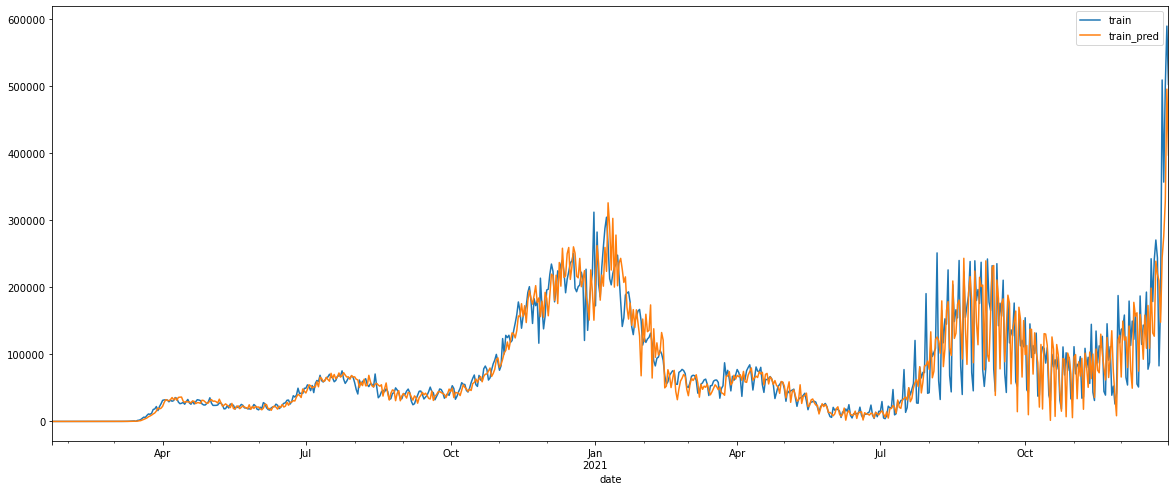

In [ ]:
USA_AA_train_pred = USA_AA.fittedvalues()
pd.concat([USA_train_new_cases, USA_AA_train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])

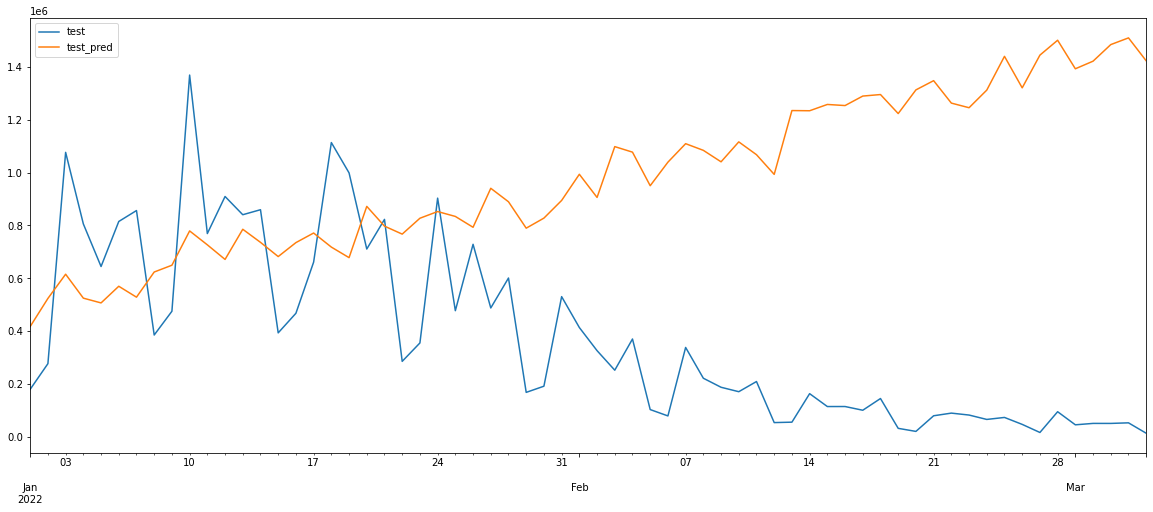

In [ ]:
USA_AA_test_pred = USA_AA.predict(n_periods=len(USA_test_new_cases))

pd.concat([USA_test_new_cases, USA_AA_test_pred], axis=1).plot(figsize=(20,8))
plt.legend(['test', 'test_pred'])

In [ ]:
USA_AA_RMSE = np.sqrt(mean_squared_error(USA_test_new_cases, USA_AA_test_pred))
USA_AA_RMSE

843364.2120131094

## ARIMA

ARIMA(10, 0, 0) RMSE=188306.554
Best ARIMA(10, 0, 0) RMSE=188306.554


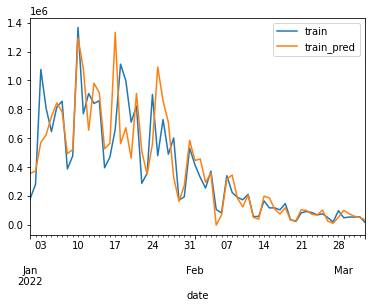

In [ ]:
p_values = range(10,11)
d_values = range(0,1)
q_values = range(0,1)

evaluate_models(USA_train_new_cases, USA_test_new_cases, p_values, d_values, q_values)

## XGBOOST

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV

x_train_USA = USA_train_imputed.drop(['iso_code', 'new_cases', 'location', 'continent'], axis=1)
y_train_USA = USA_train_imputed['new_cases']
x_test_USA = USA_test_imputed.drop(['iso_code', 'new_cases', 'location', 'continent'], axis=1)
y_test_USA = USA_test_imputed['new_cases']


scaler = StandardScaler().fit(x_train_USA)
x_train_USA_scaled = scaler.transform(x_train_USA)
x_test_USA_scaled = scaler.transform(x_test_USA)

In [85]:
USA_xg = xgb.XGBRegressor(n_jobs=-1, random_state=0)
grid = dict()
grid['n_estimators'] = range(10, 510, 10)
grid['learning_rate'] = [0.00001, 0.0001, 0.001, 0.01, 0.1]
grid['max_depth'] = range(1,6)

cv = KFold(n_splits=2, shuffle=True, random_state=1)
grid_search = GridSearchCV(estimator=USA_xg, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error',
                          verbose = True)

grid_result = grid_search.fit(x_train_USA, y_train_USA)
print("Best: %f using %s" % (np.sqrt(-grid_result.best_score_), grid_result.best_params_))

Fitting 2 folds for each of 1250 candidates, totalling 2500 fits
Best: 8704.423211 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 490}


In [34]:
USA_XGB = xgb.XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=490, n_jobs=-1, random_state=0)
USA_XGB.fit(x_train_USA_scaled, y_train_USA)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=490, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [72]:
USA_XGB_train_pred = pd.DataFrame(USA_XGB.predict(x_train_USA_scaled), columns=['yhat'], index=x_train_USA.index)
USA_XGB_train_pred.head()


,yhat
date,
2020-01-22,-11.423046
2020-01-23,-11.423046
2020-01-24,-11.423046
2020-01-25,-5.486908
2020-01-26,-5.486908


<Axes: xlabel='date'>

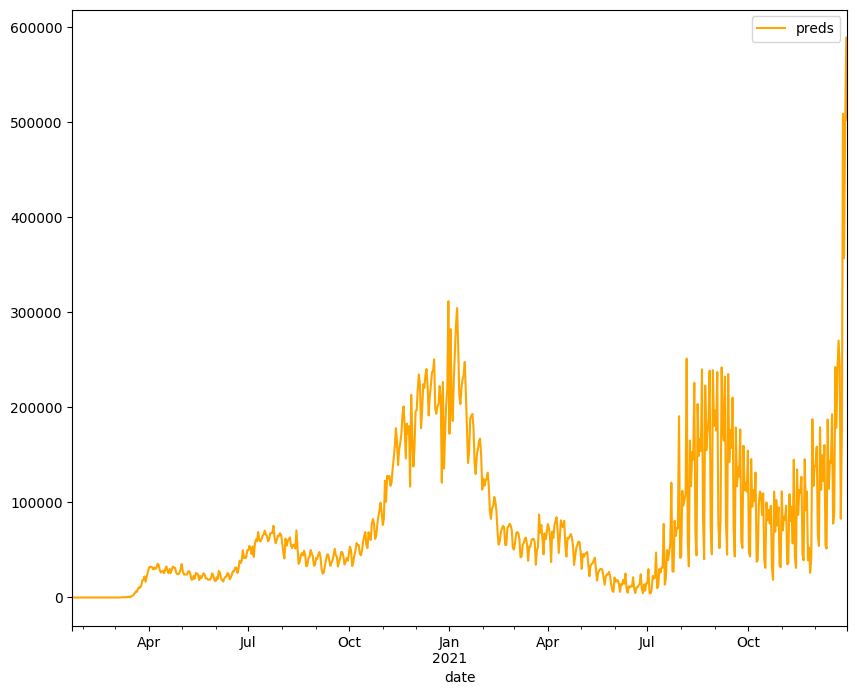

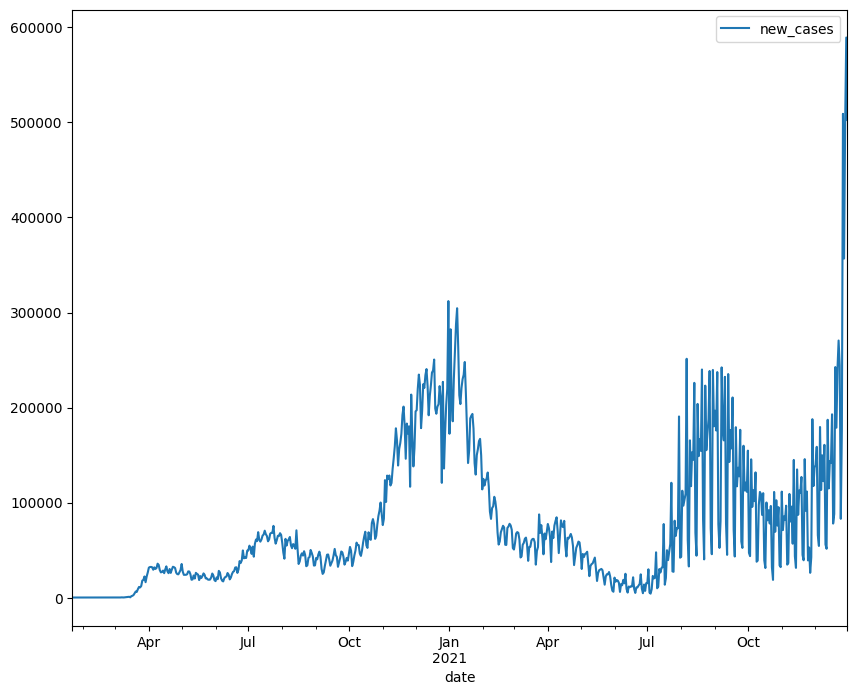

In [87]:
df_USA_tr = pd.DataFrame(y_train_USA)
df_USA_tr['preds'] = USA_XGB_train_pred
df_USA_tr.plot(y=['preds'], figsize=(10,8), color = "orange")
df_USA_tr.plot(y=['new_cases'], figsize=(10,8))

174434.60078287593


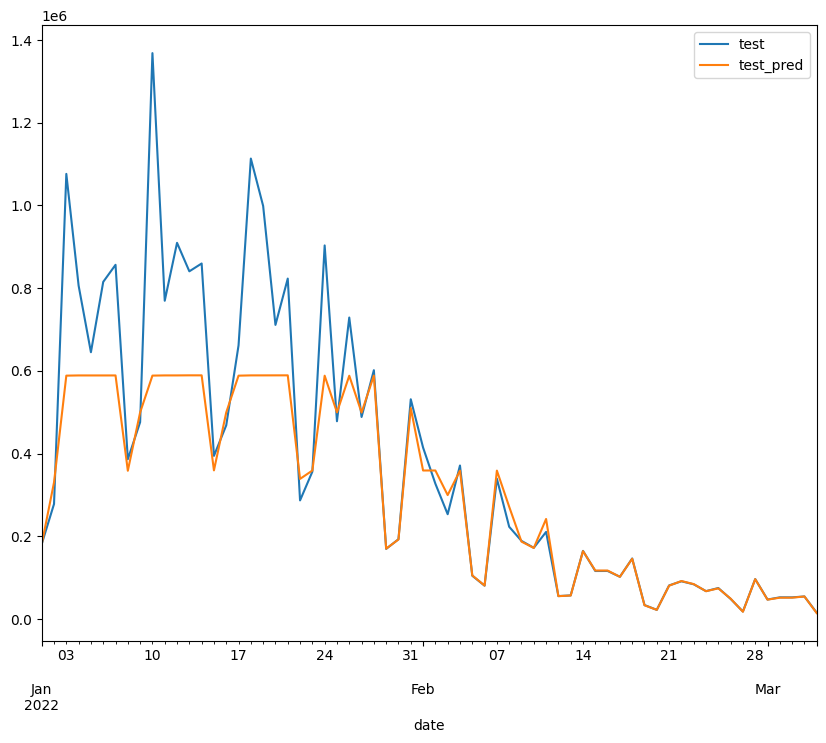

In [106]:
USA_XGB_pred = USA_XGB.predict(x_test_USA_scaled)
RMSE = np.sqrt(mean_squared_error(USA_XGB_pred, y_test_USA))
print(RMSE)


df_USA = pd.DataFrame(y_test_USA)
df_USA['preds'] = USA_XGB_pred
df_USA.plot(y=['new_cases', 'preds'], figsize=(10,8))
plt.legend(['test', 'test_pred'])

# Germany

## Auto-ARIMA

In [ ]:
Germany_train_new_cases = Germany_train_imputed['new_cases']
Germany_test_new_cases = Germany_test_imputed['new_cases']

Germany_AA = auto_arima(Germany_train_new_cases, start_p=1, start_q=1,
                           max_p=100,
                           max_q=100,
                           m=1,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
print(Germany_AA.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14618.308, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14837.939, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14754.978, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14644.330, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14835.948, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14613.164, Time=0.35 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=14752.138, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=14545.170, Time=0.29 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=14711.267, Time=0.12 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=14454.180, Time=0.27 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=14605.192, Time=0.13 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=14365.732, Time=0.39 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=14446.498, Time=0.21 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=14307.828, Time=0.72 sec
 ARIMA(6,1,0)(0,0,0

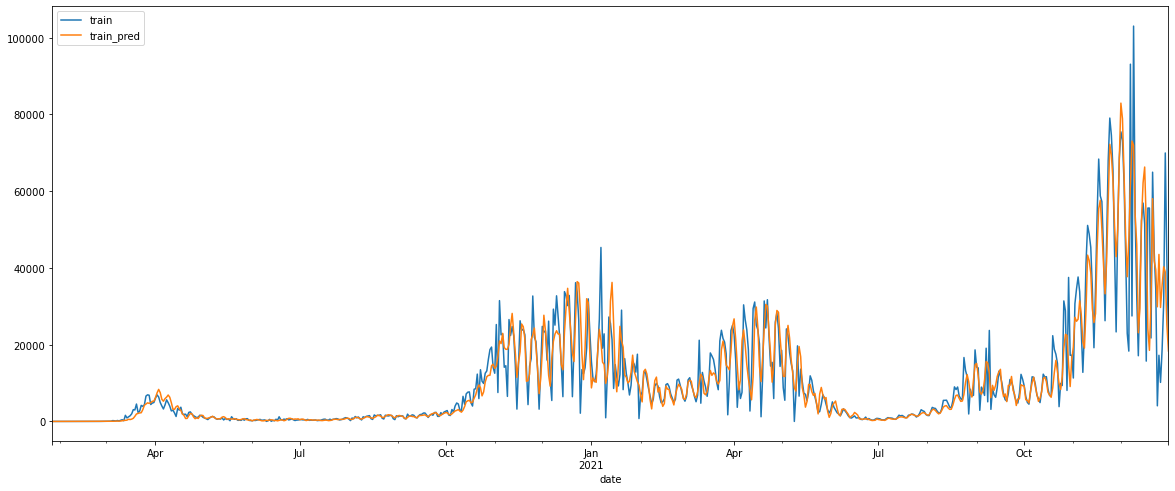

In [ ]:
Germany_AA_train_pred = Germany_AA.fittedvalues()
pd.concat([Germany_train_new_cases, Germany_AA_train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])

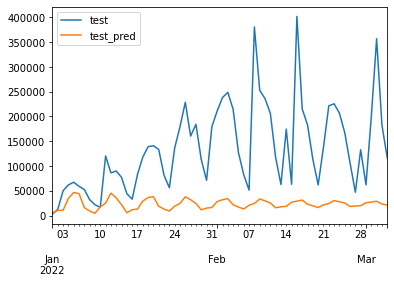

In [ ]:
Germany_AA_test_pred = Germany_AA.predict(n_periods=len(Germany_test_new_cases))
pd.concat([Germany_test_new_cases, Germany_AA_test_pred], axis=1).plot()

plt.legend(['test', 'test_pred'])

In [ ]:
Germany_AA_RMSE = np.sqrt(mean_squared_error(Germany_test_new_cases, Germany_AA_test_pred))
Germany_AA_RMSE

139441.2990206457

## ARIMA

ARIMA(10, 0, 0) RMSE=59671.361
Best ARIMA(10, 0, 0) RMSE=59671.361


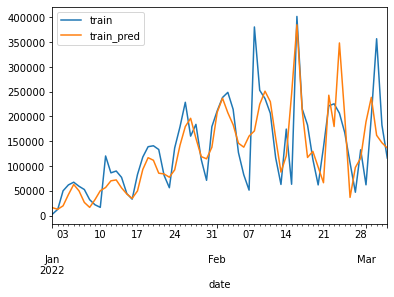

In [ ]:
p_values = range(10,11)
d_values = range(0,1)
q_values = range(0,1)

evaluate_models(Germany_train_new_cases, Germany_test_new_cases, p_values, d_values, q_values)

## XGBOOST

In [38]:
x_train_Germany = Germany_train_imputed.drop(['iso_code', 'new_cases', 'location', 'continent'], axis=1)
y_train_Germany = Germany_train_imputed['new_cases']
x_test_Germany = Germany_test_imputed.drop(['iso_code', 'new_cases', 'location', 'continent'], axis=1)
y_test_Germany = Germany_test_imputed['new_cases']


scaler = StandardScaler().fit(x_train_Germany)
x_train_Germany_scaled = scaler.transform(x_train_Germany)
x_test_Germany_scaled = scaler.transform(x_test_Germany)

In [39]:
Ger_xg = xgb.XGBRegressor(n_jobs=-1, random_state=0)
grid = dict()
grid['n_estimators'] = range(10, 510, 10)
grid['learning_rate'] = [0.00001, 0.0001, 0.001, 0.01, 0.1]
grid['max_depth'] = range(1,6)

cv = KFold(n_splits=2, shuffle=True, random_state=0)
grid_search = GridSearchCV(estimator=Ger_xg, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error',
                          verbose = True)

grid_result = grid_search.fit(x_train_Germany, y_train_Germany)
print("Best: %f using %s" % (np.sqrt(-grid_result.best_score_), grid_result.best_params_))

Fitting 2 folds for each of 1250 candidates, totalling 2500 fits
Best: 646.195920 using {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 90}


In [41]:
Germany_XGB = xgb.XGBRegressor(learning_rate=0.1, max_depth=2, n_estimators=90, n_jobs=-1, random_state=0)
Germany_XGB.fit(x_train_Germany_scaled, y_train_Germany)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=90, n_jobs=-1, num_parallel_tree=None, predictor=None,
             random_state=0, ...)

<Axes: xlabel='date'>

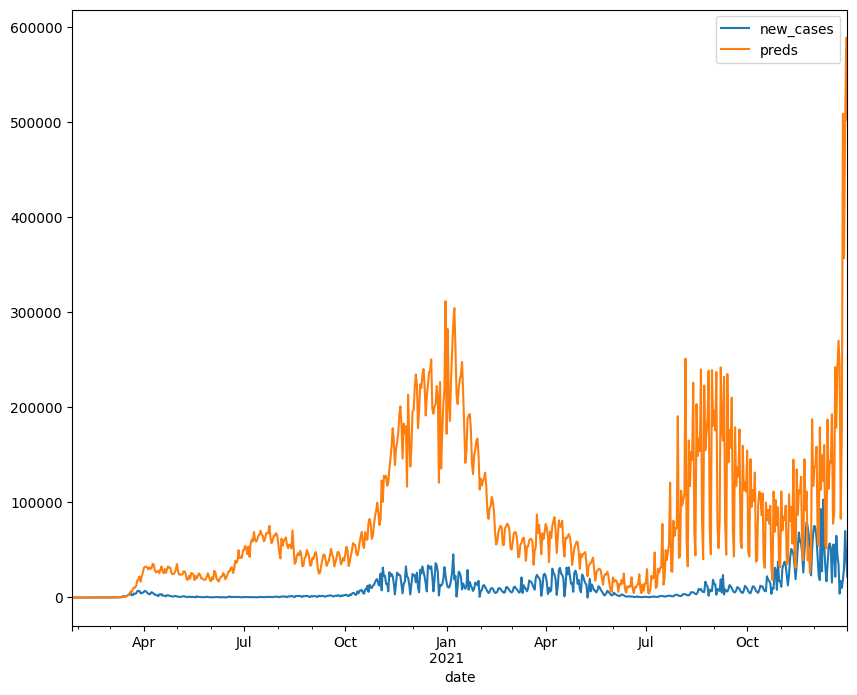

In [89]:
Germany_XGB_train_pred = pd.DataFrame(Germany_XGB.predict(x_train_Germany_scaled), columns=['yhat'], index=x_train_Germany.index)
Germany_XGB_train_pred.head()


df_Ger_tr = pd.DataFrame(y_train_Germany)
df_Ger_tr['preds'] = USA_XGB_train_pred
df_Ger_tr.plot(y=['new_cases', 'preds'], figsize=(10,8))

86890.1848430205


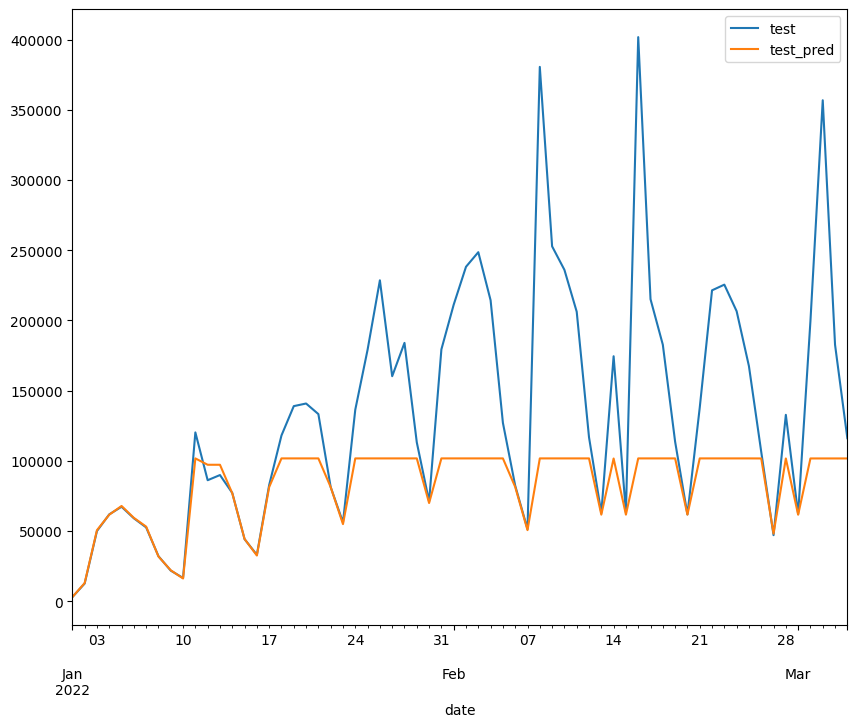

In [105]:
Germany_XGB_pred = Germany_XGB.predict(x_test_Germany_scaled)
RMSE = np.sqrt(mean_squared_error(Germany_XGB_pred, y_test_Germany))
print(RMSE)


df_Germany = pd.DataFrame(y_test_Germany)
df_Germany['preds'] = Germany_XGB_pred
df_Germany.plot(y=['new_cases', 'preds'], figsize=(10,8))
plt.legend(['test', 'test_pred'])

# Brazil

## Auto-ARIMA

In [ ]:
Brazil_train_new_cases = Brazil_train_imputed['new_cases']
Brazil_test_new_cases = Brazil_test_imputed['new_cases']

Brazil_AA = auto_arima(Brazil_train_new_cases, start_p=1, start_q=1,
                           max_p=100,
                           max_q=100,
                           m=1,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
print(Brazil_AA.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14623.610, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14772.521, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14774.195, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14773.685, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14770.523, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14535.725, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=14715.568, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=14518.969, Time=0.27 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=14685.393, Time=0.07 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=14452.542, Time=0.42 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=14626.238, Time=0.15 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=14274.020, Time=0.31 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=14363.342, Time=0.18 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=14156.890, Time=0.85 sec
 ARIMA(6,1,0)(0,0,0

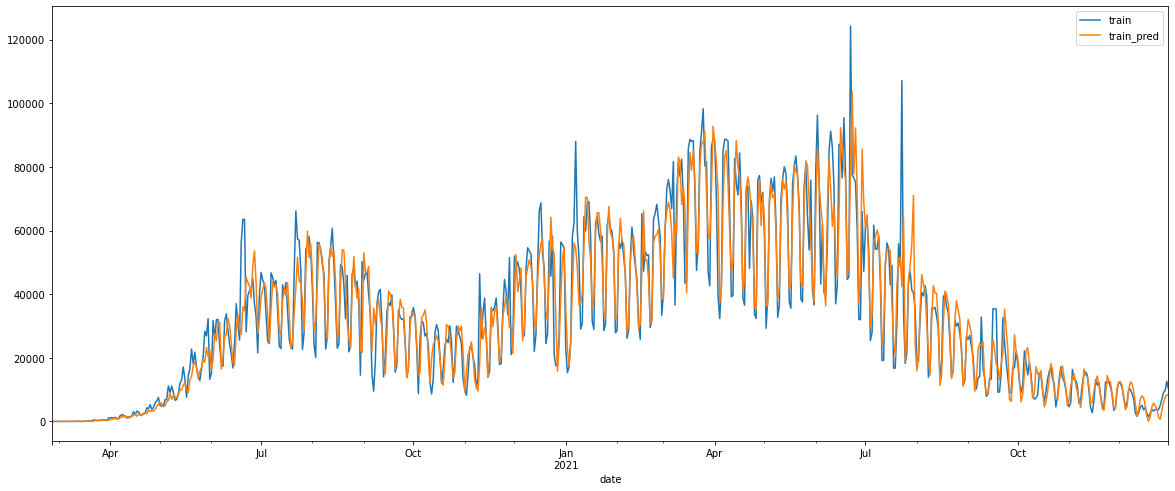

In [ ]:
Brazil_AA_train_pred = Brazil_AA.fittedvalues()
pd.concat([Brazil_train_new_cases, Brazil_AA_train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])

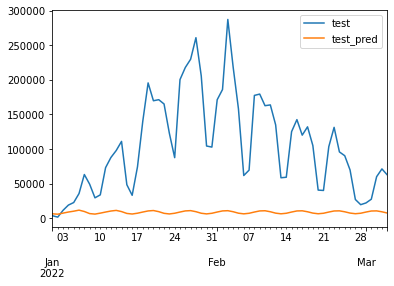

In [ ]:
Brazil_AA_test_pred = Brazil_AA.predict(n_periods=len(Brazil_test_new_cases))
pd.concat([Brazil_test_new_cases, Brazil_AA_test_pred], axis=1).plot()

plt.legend(['test', 'test_pred'])

In [ ]:
Brazil_AA_RMSE = np.sqrt(mean_squared_error(Brazil_test_new_cases, Brazil_AA_test_pred))
Brazil_AA_RMSE

117925.85049235162

## ARIMA

ARIMA(10, 0, 0) RMSE=31840.476
Best ARIMA(10, 0, 0) RMSE=31840.476


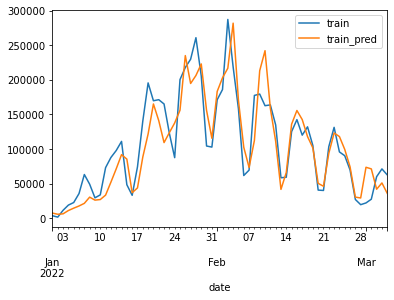

In [ ]:
p_values = range(10,11)
d_values = range(0,1)
q_values = range(0,1)

evaluate_models(Brazil_train_new_cases, Brazil_test_new_cases, p_values, d_values, q_values)

## XGBOOST

In [43]:
x_train_Brazil = Brazil_train_imputed.drop(['iso_code', 'new_cases', 'location', 'continent'], axis=1)
y_train_Brazil = Brazil_train_imputed['new_cases']
x_test_Brazil = Brazil_test_imputed.drop(['iso_code', 'new_cases', 'location', 'continent'], axis=1)
y_test_Brazil = Brazil_test_imputed['new_cases']


scaler = StandardScaler().fit(x_train_Brazil)
x_train_Brazil_scaled = scaler.transform(x_train_Brazil)
x_test_Brazil_scaled = scaler.transform(x_test_Brazil)

In [45]:
Bra_xg = xgb.XGBRegressor(n_jobs=-1, random_state=0)
grid = dict()
grid['n_estimators'] = range(10, 510, 10)
grid['learning_rate'] = [0.00001, 0.0001, 0.001, 0.01, 0.1]
grid['max_depth'] = range(1,6)

cv = KFold(n_splits=2, shuffle=True, random_state=0)
grid_search = GridSearchCV(estimator=Bra_xg, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error',
                          verbose = True)

grid_result = grid_search.fit(x_train_Brazil, y_train_Brazil)
print("Best: %f using %s" % (np.sqrt(-grid_result.best_score_), grid_result.best_params_))

Fitting 2 folds for each of 1250 candidates, totalling 2500 fits
Best: 885.123428 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 130}


In [46]:
Brazil_XGB = xgb.XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=130, n_jobs=-1, random_state=0)
Brazil_XGB.fit(x_train_Brazil_scaled, y_train_Brazil)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=130, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

<Axes: xlabel='date'>

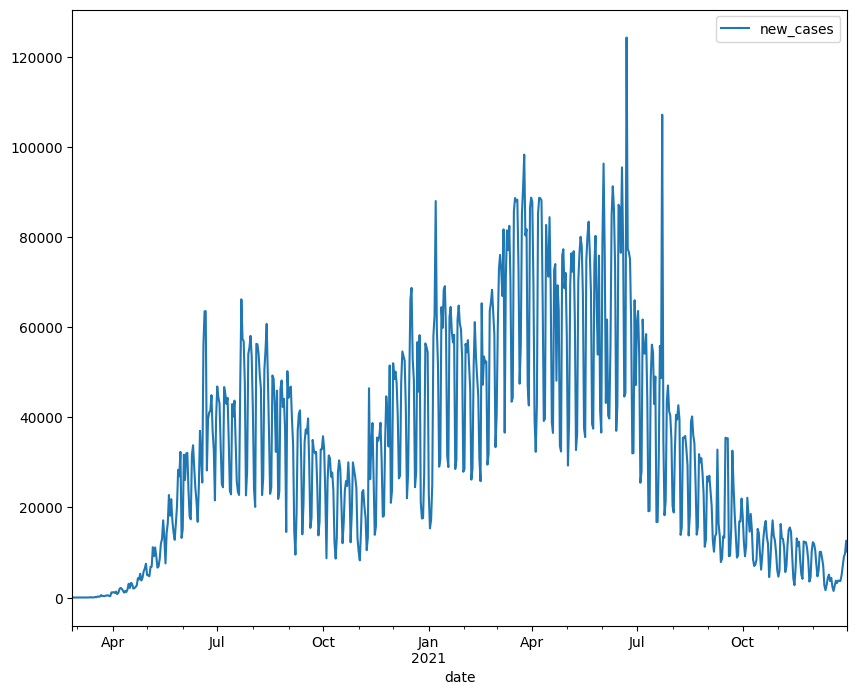

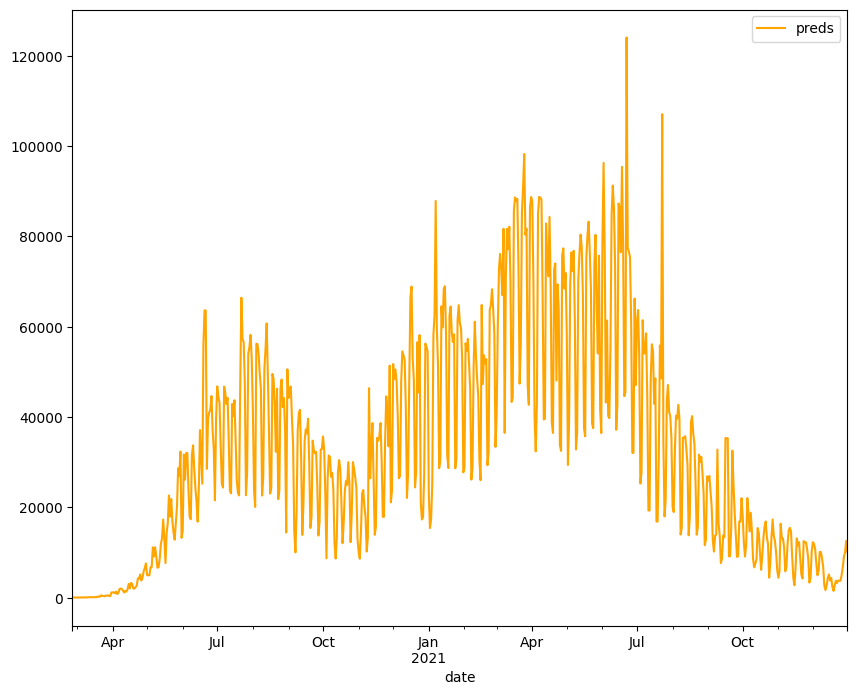

In [91]:
Brazil_XGB_train_pred = pd.DataFrame(Brazil_XGB.predict(x_train_Brazil_scaled), columns=['yhat'], index=x_train_Brazil.index)
Brazil_XGB_train_pred.head()


df_Bra_tr = pd.DataFrame(y_train_Brazil)
df_Bra_tr['preds'] = Brazil_XGB_train_pred
df_Bra_tr.plot(y=['new_cases'], figsize=(10,8))
df_Bra_tr.plot(y=['preds'], figsize=(10,8), color="orange")

42516.078874093466


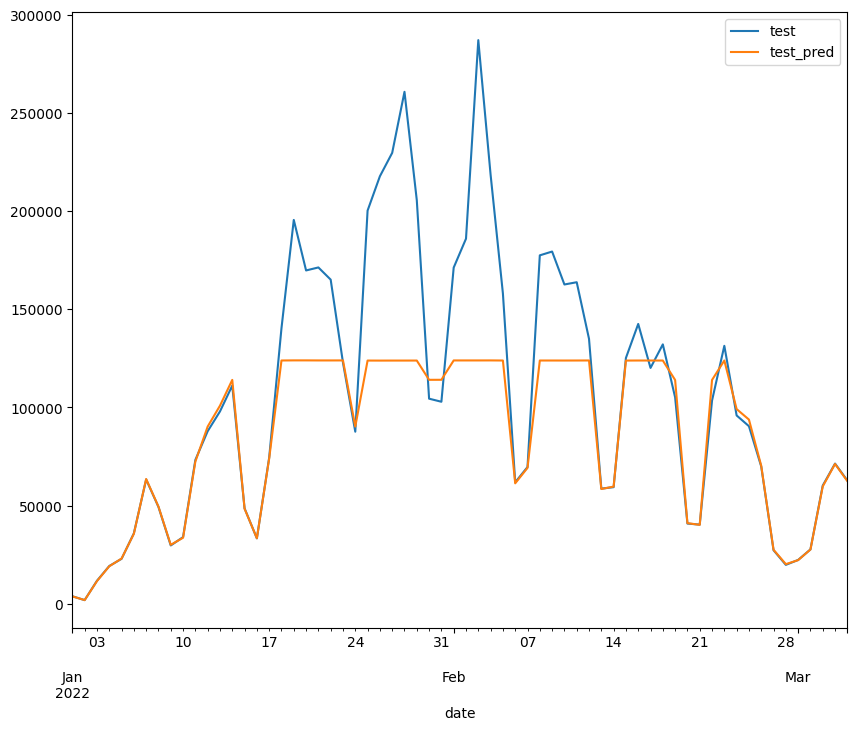

In [104]:
Brazil_XGB_pred = Brazil_XGB.predict(x_test_Brazil_scaled)
RMSE = np.sqrt(mean_squared_error(Brazil_XGB_pred, y_test_Brazil))
print(RMSE)


df_Brazil = pd.DataFrame(y_test_Brazil)
df_Brazil['preds'] = Brazil_XGB_pred
df_Brazil.plot(y=['new_cases', 'preds'], figsize=(10,8))
plt.legend(['test', 'test_pred'])

# China

## Auto-ARIMA

In [ ]:
China_train_new_cases = China_train_imputed['new_cases']
China_test_new_cases = China_test_imputed['new_cases']

China_AA = auto_arima(China_train_new_cases, start_p=1, start_q=1,
                           max_p=100,
                           max_q=100,
                           m=1,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
print(China_AA.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11052.371, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11297.570, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11193.852, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11057.824, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11295.571, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11048.677, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11111.966, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11050.673, Time=0.23 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11049.882, Time=0.48 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11048.991, Time=0.39 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=11078.309, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=11050.349, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=11046.681, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=11050.383, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0

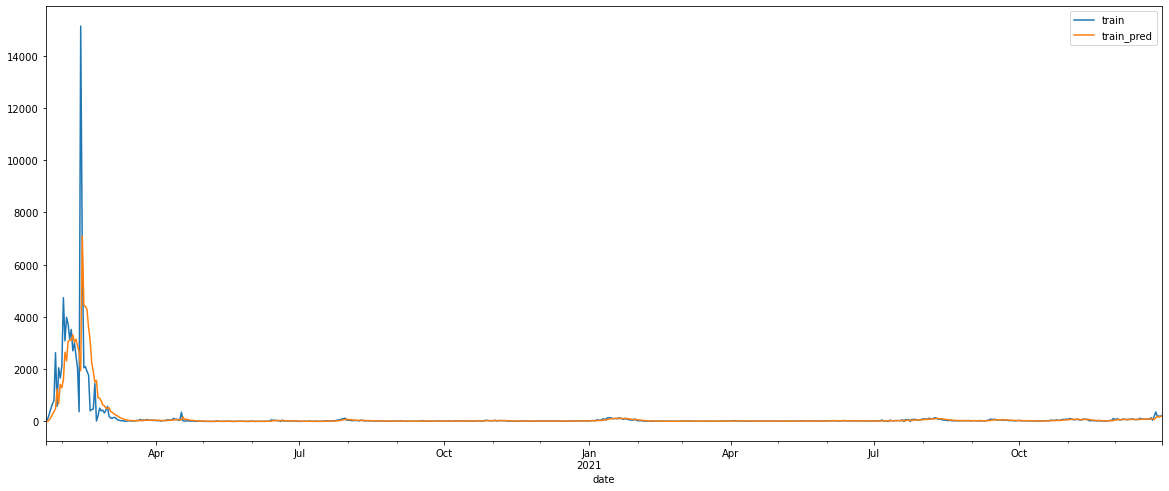

In [ ]:
China_AA_train_pred = China_AA.fittedvalues()
pd.concat([China_train_new_cases, China_AA_train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])

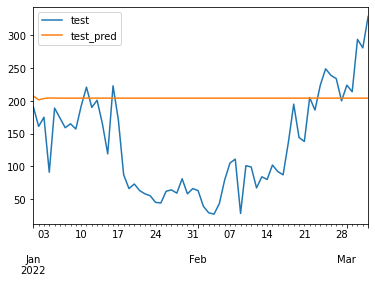

In [ ]:
China_AA_test_pred = China_AA.predict(n_periods=len(China_test_new_cases))
pd.concat([China_test_new_cases, China_AA_test_pred], axis=1).plot()

plt.legend(['test', 'test_pred'])

In [ ]:
China_AA_RMSE = np.sqrt(mean_squared_error(China_test_new_cases, China_AA_test_pred))
China_AA_RMSE

102.32010146597536

## ARIMA

ARIMA(10, 0, 0) RMSE=41.638
Best ARIMA(10, 0, 0) RMSE=41.638


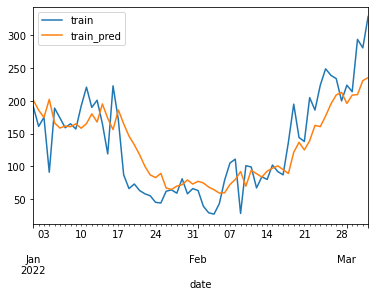

In [ ]:
p_values = range(10,11)
d_values = range(0,1)
q_values = range(0,1)

evaluate_models(China_train_new_cases, China_test_new_cases, p_values, d_values, q_values)

## XGBOOST

In [49]:
x_train_China = China_train_imputed.drop(['iso_code', 'new_cases', 'location', 'continent'], axis=1)
y_train_China = China_train_imputed['new_cases']
x_test_China = China_test_imputed.drop(['iso_code', 'new_cases', 'location', 'continent'], axis=1)
y_test_China = China_test_imputed['new_cases']


scaler = StandardScaler().fit(x_train_China)
x_train_China_scaled = scaler.transform(x_train_China)
x_test_China_scaled = scaler.transform(x_test_China)

In [50]:
Chi_xg = xgb.XGBRegressor(n_jobs=-1, random_state=0)
grid = dict()
grid['n_estimators'] = range(10, 510, 10)
grid['learning_rate'] = [0.00001, 0.0001, 0.001, 0.01, 0.1]
grid['max_depth'] = range(1,6)

cv = KFold(n_splits=2, shuffle=True, random_state=0)
grid_search = GridSearchCV(estimator=Chi_xg, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error',
                          verbose = True)

grid_result = grid_search.fit(x_train_China, y_train_China)
print("Best: %f using %s" % (np.sqrt(-grid_result.best_score_), grid_result.best_params_))

Fitting 2 folds for each of 1250 candidates, totalling 2500 fits
Best: 443.830799 using {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 500}


In [53]:
China_XGB = xgb.XGBRegressor(learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, random_state=0)
China_XGB.fit(x_train_China_scaled, y_train_China)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

<Axes: xlabel='date'>

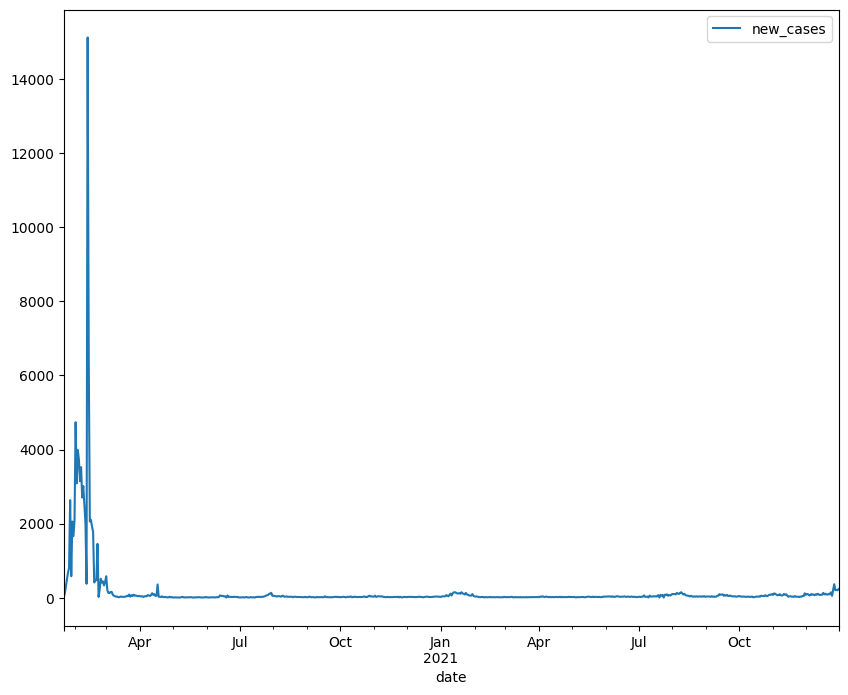

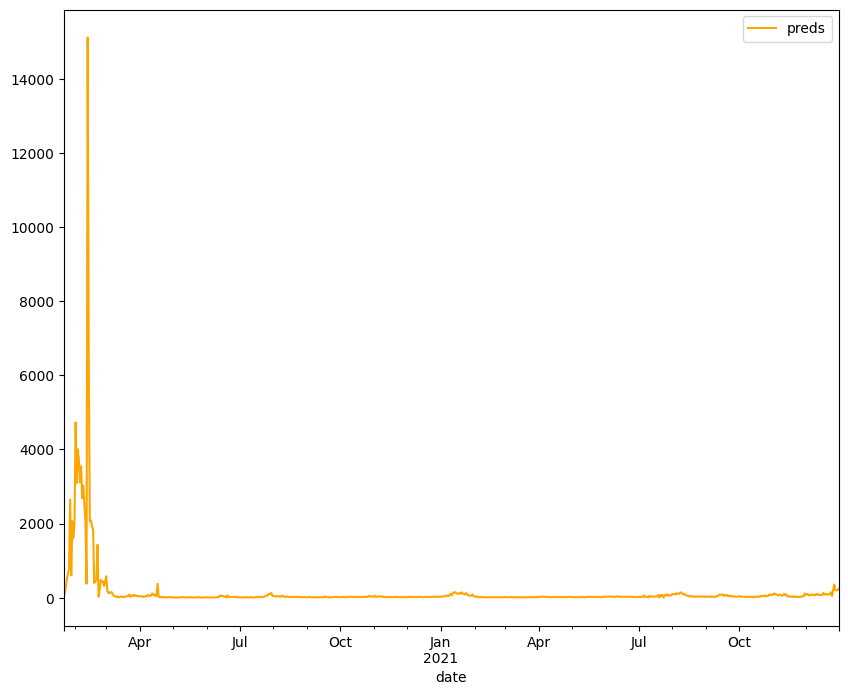

In [92]:
China_XGB_train_pred = pd.DataFrame(China_XGB.predict(x_train_China_scaled), columns=['yhat'], index=x_train_China.index)
China_XGB_train_pred.head()


df_Chi_tr = pd.DataFrame(y_train_China)
df_Chi_tr['preds'] = China_XGB_train_pred
df_Chi_tr.plot(y=['new_cases'], figsize=(10,8))
df_Chi_tr.plot(y=['preds'], figsize=(10,8), color="orange")

12.434477902208817


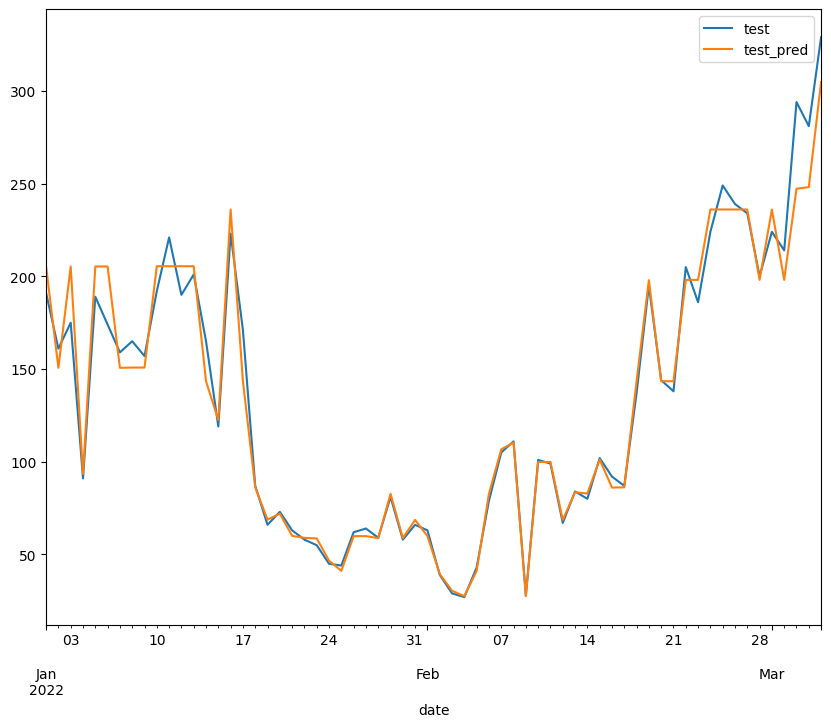

In [103]:
China_XGB_pred = China_XGB.predict(x_test_China_scaled)
RMSE = np.sqrt(mean_squared_error(China_XGB_pred, y_test_China))
print(RMSE)


df_China = pd.DataFrame(y_test_China)
df_China['preds'] = China_XGB_pred
df_China.plot(y=['new_cases', 'preds'], figsize=(10,8))
plt.legend(['test', 'test_pred'])

# Nigeria

## Auto-ARIMA

In [ ]:
Nigeria_train_new_cases = Nigeria_train_imputed['new_cases']
Nigeria_test_new_cases = Nigeria_test_imputed['new_cases']

Nigeria_AA = auto_arima(Nigeria_train_new_cases, start_p=1, start_q=1,
                           max_p=100,
                           max_q=100,
                           m=1,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
print(Nigeria_AA.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9562.825, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9930.209, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9710.027, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9567.321, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9928.210, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9564.258, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9569.258, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=9562.495, Time=0.36 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=9564.387, Time=0.44 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=9564.976, Time=0.65 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=9560.781, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=9565.684, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=9567.623, Time=0.24 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=9562.664, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]          

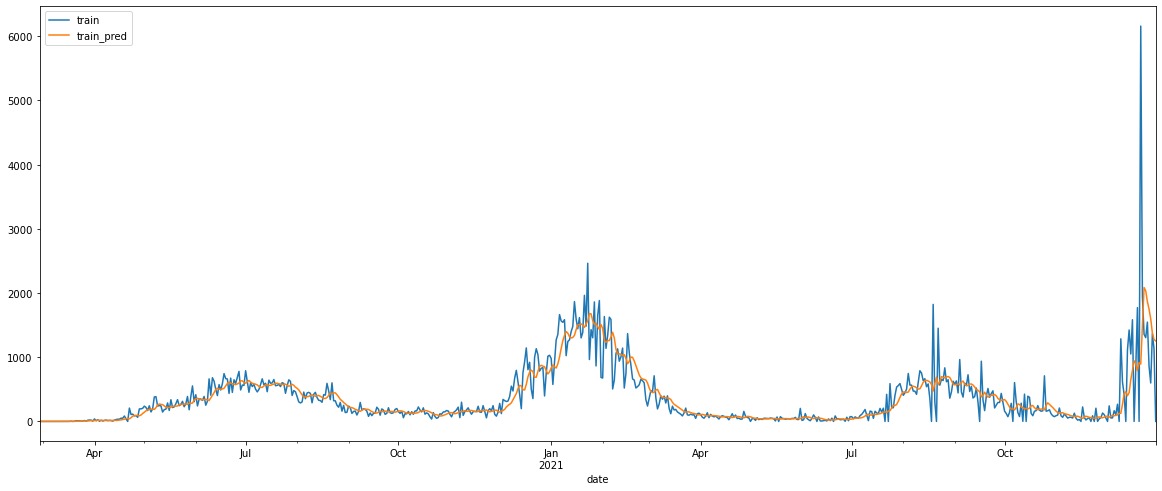

In [ ]:
Nigeria_AA_train_pred = Nigeria_AA.fittedvalues()
pd.concat([Nigeria_train_new_cases, Nigeria_AA_train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])

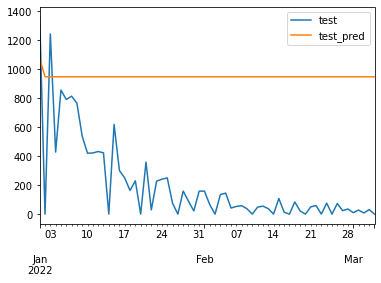

In [ ]:
Nigeria_AA_test_pred = Nigeria_AA.predict(n_periods=len(Nigeria_test_new_cases))
pd.concat([Nigeria_test_new_cases, Nigeria_AA_test_pred], axis=1).plot()

plt.legend(['test', 'test_pred'])

In [ ]:
Nigeria_AA_RMSE = np.sqrt(mean_squared_error(Nigeria_test_new_cases, Nigeria_AA_test_pred))
Nigeria_AA_RMSE

798.6282447743923

## ARIMA

ARIMA(10, 0, 0) RMSE=210.493
Best ARIMA(10, 0, 0) RMSE=210.493


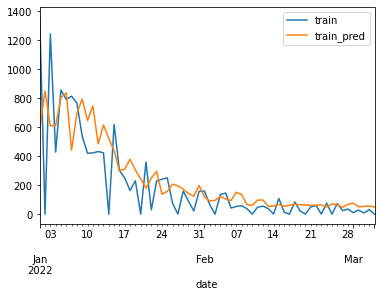

In [ ]:
p_values = range(10,11)
d_values = range(0,1)
q_values = range(0,1)

evaluate_models(Nigeria_train_new_cases, Nigeria_test_new_cases, p_values, d_values, q_values)

## XGBOOST

In [55]:
x_train_Nigeria = Nigeria_train_imputed.drop(['iso_code', 'new_cases', 'location', 'continent'], axis=1)
y_train_Nigeria = Nigeria_train_imputed['new_cases']
x_test_Nigeria = Nigeria_test_imputed.drop(['iso_code', 'new_cases', 'location', 'continent'], axis=1)
y_test_Nigeria = Nigeria_test_imputed['new_cases']


scaler = StandardScaler().fit(x_train_Nigeria)
x_train_Nigeria_scaled = scaler.transform(x_train_Nigeria)
x_test_Nigeria_scaled = scaler.transform(x_test_Nigeria)

In [56]:
N_xg = xgb.XGBRegressor(n_jobs=-1, random_state=0)
grid = dict()
grid['n_estimators'] = range(10, 510, 10)
grid['learning_rate'] = [0.00001, 0.0001, 0.001, 0.01, 0.1]
grid['max_depth'] = range(1,6)

cv = KFold(n_splits=2, shuffle=True, random_state=0)
grid_search = GridSearchCV(estimator=N_xg, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error',
                          verbose = True)

grid_result = grid_search.fit(x_train_Nigeria, y_train_Nigeria)
print("Best: %f using %s" % (np.sqrt(-grid_result.best_score_), grid_result.best_params_))

Fitting 2 folds for each of 1250 candidates, totalling 2500 fits
Best: 145.107838 using {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 490}


In [58]:
Nigeria_XGB = xgb.XGBRegressor(learning_rate=0.1, max_depth=1, n_estimators=490, n_jobs=-1, random_state=0)
Nigeria_XGB.fit(x_train_Nigeria_scaled, y_train_Nigeria)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=490, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

<Axes: xlabel='date'>

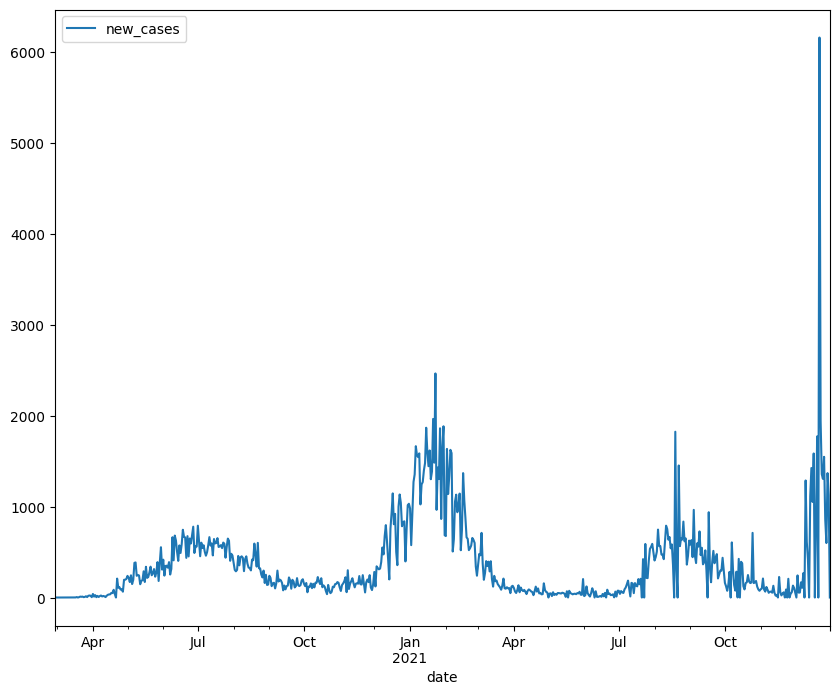

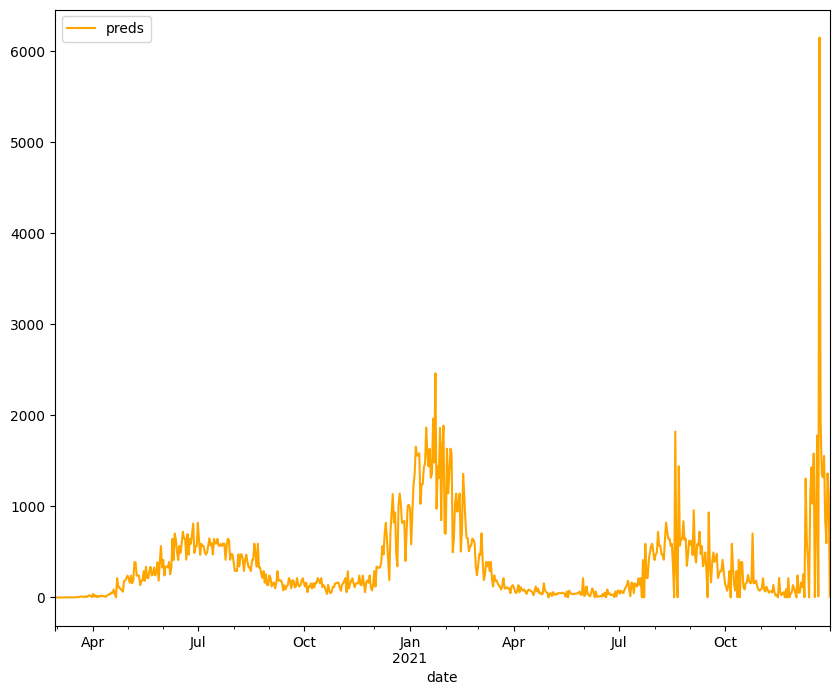

In [94]:
Nigeria_XGB_train_pred = pd.DataFrame(Nigeria_XGB.predict(x_train_Nigeria_scaled), columns=['yhat'], index=x_train_Nigeria.index)
Nigeria_XGB_train_pred.head()


df_N_tr = pd.DataFrame(y_train_Nigeria)
df_N_tr['preds'] = Nigeria_XGB_train_pred
df_N_tr.plot(y=['new_cases'], figsize=(10,8))
df_N_tr.plot(y=['preds'], figsize=(10,8), color="orange")

11.627427456666302


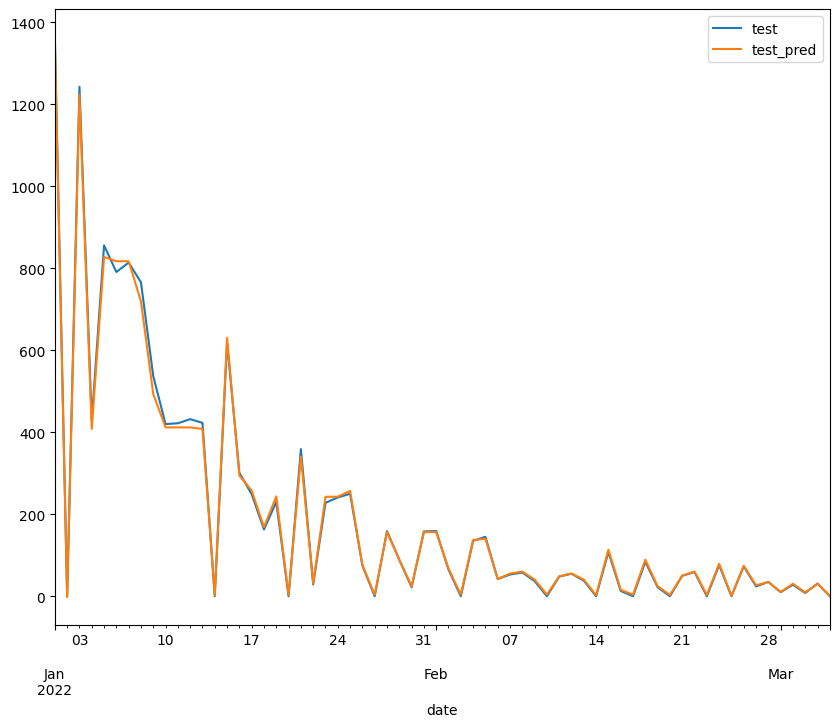

In [102]:
Nigeria_XGB_pred = Nigeria_XGB.predict(x_test_Nigeria_scaled)
RMSE = np.sqrt(mean_squared_error(Nigeria_XGB_pred, y_test_Nigeria))
print(RMSE)


df_Nigeria = pd.DataFrame(y_test_Nigeria)
df_Nigeria['preds'] = Nigeria_XGB_pred
df_Nigeria.plot(y=['new_cases', 'preds'], figsize=(10,8))
plt.legend(['test', 'test_pred'])

# Australia

## Auto-ARIMA

In [ ]:
Australia_train_new_cases = Australia_train_imputed['new_cases']
Australia_test_new_cases = Australia_test_imputed['new_cases']

Australia_AA = auto_arima(Australia_train_new_cases, start_p=1, start_q=1,
                           max_p=100,
                           max_q=100,
                           m=1,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
print(Australia_AA.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10959.149, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10981.181, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10965.742, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10972.387, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10983.032, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10696.094, Time=0.74 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10693.124, Time=0.70 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=10622.636, Time=0.93 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=10502.328, Time=0.92 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=10435.529, Time=1.16 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=i

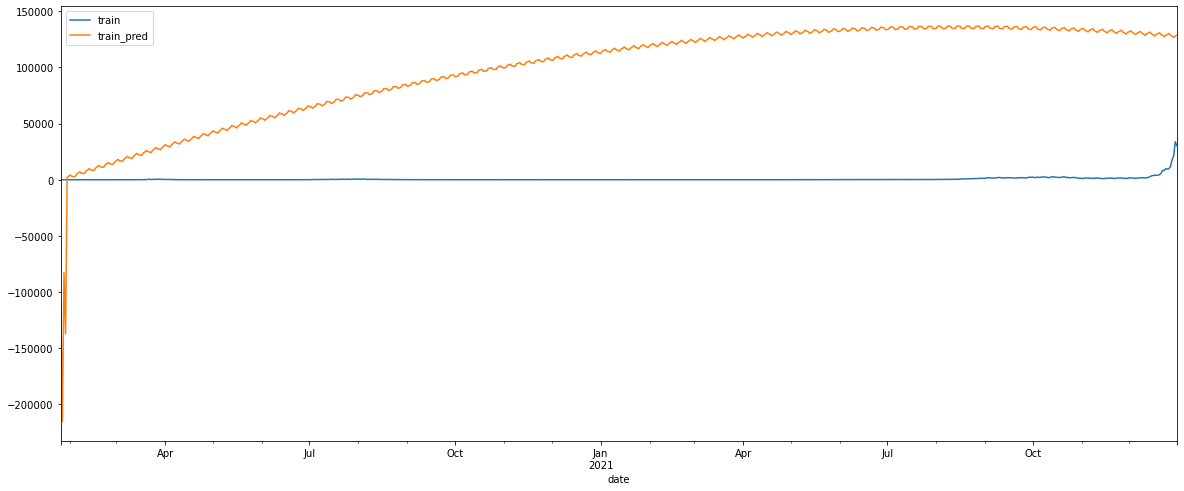

In [ ]:
Australia_AA_train_pred = Australia_AA.fittedvalues()
pd.concat([Australia_train_new_cases, Australia_AA_train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])

In [ ]:
print(Australia_AA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  706
Model:               SARIMAX(7, 1, 3)   Log Likelihood                 -70.225
Date:                Sun, 12 Nov 2023   AIC                            164.450
Time:                        18:13:15   BIC                            219.149
Sample:                    01-26-2020   HQIC                           185.587
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -6.3023   6.78e-05   -9.3e+04      0.000      -6.302      -6.302
ar.L1         -0.6545    4.8e-05  -1.36e+04      0.000      -0.655      -0.654
ar.L2          0.6695   7.59e-05   8819.785      0.0

In [ ]:
Australia_AA_test_pred = Australia_AA.predict()
pd.concat([Australia_test_new_cases, Australia_AA_test_pred], axis=1).plot()

plt.legend(['test', 'test_pred'])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
Australia_AA_RMSE = np.sqrt(mean_squared_error(Australia_test_new_cases, Australia_AA_test_pred))
Australia_AA_RMSE

NameError: name 'Australia_AA_test_pred' is not defined

## ARIMA

In [ ]:
p_values = range(10,11)
d_values = range(0,1)
q_values = range(0,1)

evaluate_models(Australia_train_new_cases, Australia_test_new_cases, p_values, d_values, q_values)

LinAlgError: LU decomposition error.

## XGBOOST

In [60]:
x_train_Aus = Australia_train_imputed.drop(['iso_code', 'new_cases', 'location', 'continent'], axis=1)
y_train_Aus = Australia_train_imputed['new_cases']
x_test_Aus = Australia_test_imputed.drop(['iso_code', 'new_cases', 'location', 'continent'], axis=1)
y_test_Aus = Australia_test_imputed['new_cases']


scaler = StandardScaler().fit(x_train_Aus)
x_train_Aus_scaled = scaler.transform(x_train_Aus)
x_test_Aus_scaled = scaler.transform(x_test_Aus)

In [61]:
Aus_xg = xgb.XGBRegressor(n_jobs=-1, random_state=0)
grid = dict()
grid['n_estimators'] = range(10, 510, 10)
grid['learning_rate'] = [0.00001, 0.0001, 0.001, 0.01, 0.1]
grid['max_depth'] = range(1,6)

cv = KFold(n_splits=2, shuffle=True, random_state=0)
grid_search = GridSearchCV(estimator=Aus_xg, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error',
                          verbose = True)

grid_result = grid_search.fit(x_train_Aus, y_train_Aus)
print("Best: %f using %s" % (np.sqrt(-grid_result.best_score_), grid_result.best_params_))

Fitting 2 folds for each of 1250 candidates, totalling 2500 fits
Best: 1170.909037 using {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}


In [96]:
Aus_XGB = xgb.XGBRegressor(learning_rate=0.01, max_depth=4, n_estimators=500, n_jobs=-1, random_state=0)
Aus_XGB.fit(x_train_Aus_scaled, y_train_Aus)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

<Axes: xlabel='date'>

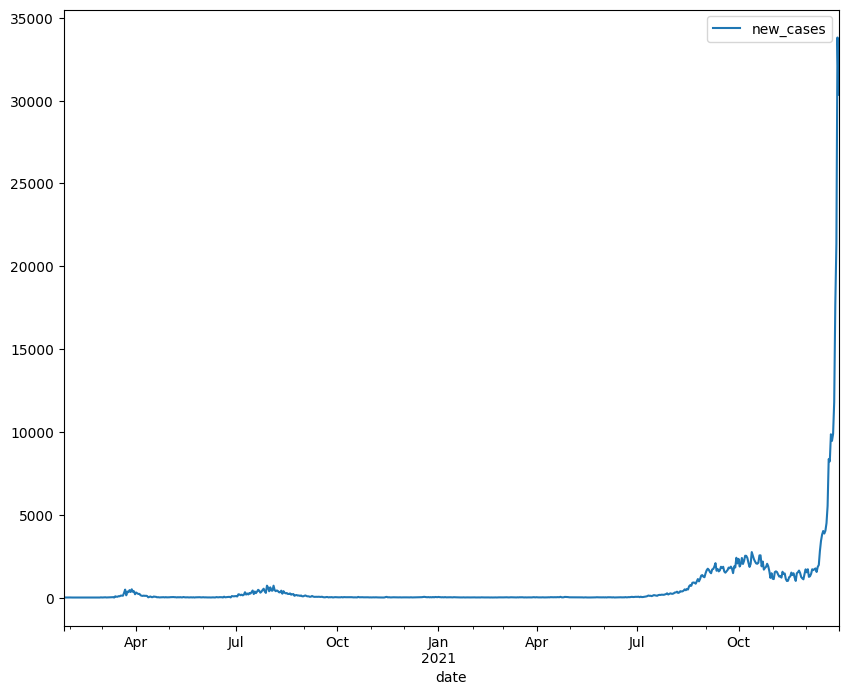

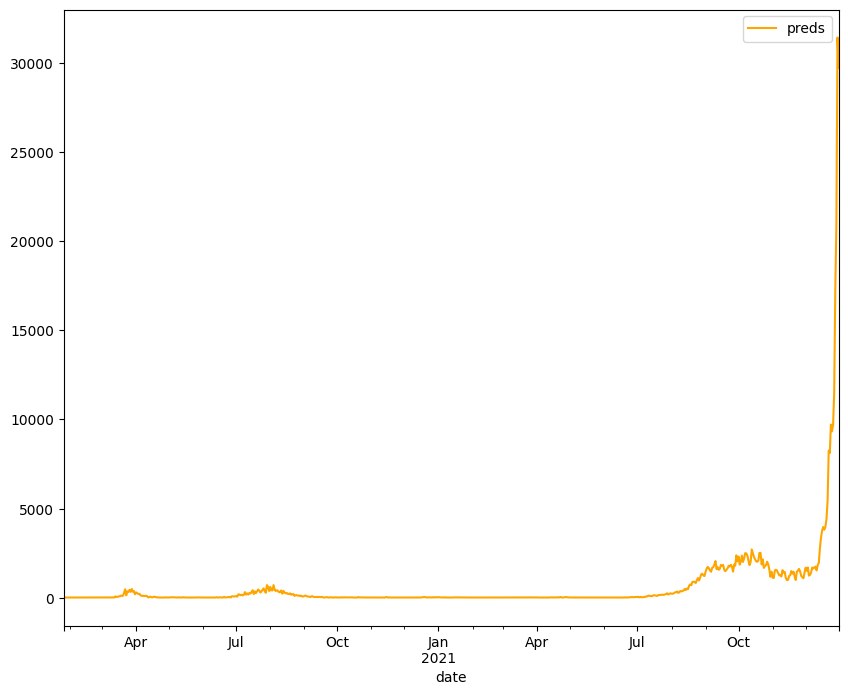

In [100]:
Aus_XGB_train_pred = pd.DataFrame(Aus_XGB.predict(x_train_Aus_scaled), columns=['yhat'], index=x_train_Aus.index)
Aus_XGB_train_pred.head()


df_Aus_tr = pd.DataFrame(y_train_Aus)
df_Aus_tr['preds'] = Aus_XGB_train_pred
df_Aus_tr.plot(y=['new_cases'], figsize=(10,8))
df_Aus_tr.plot(y=['preds'], figsize=(10,8), color="orange")

35314.61551004963


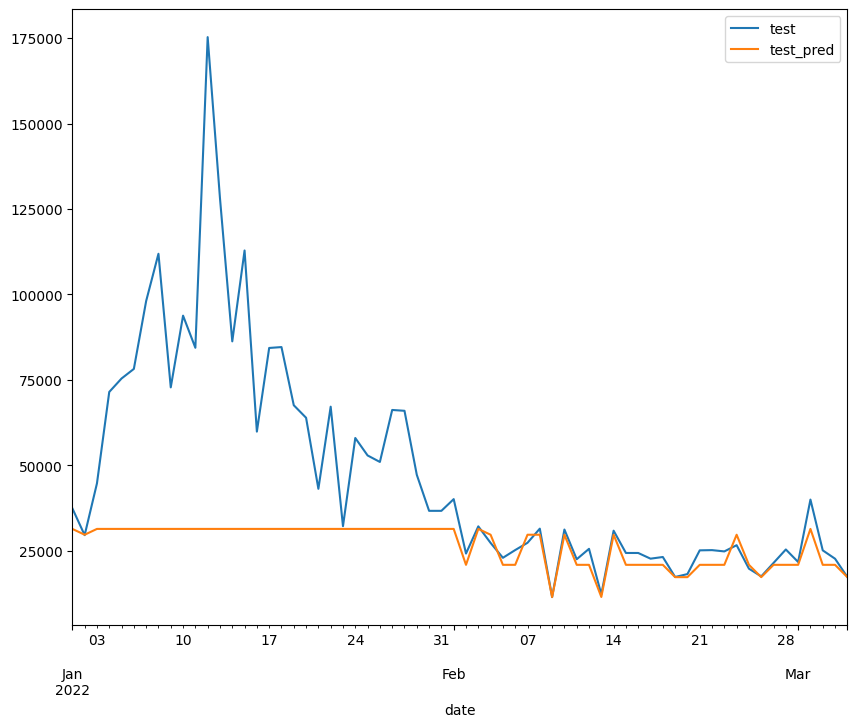

In [101]:
Aus_XGB_pred = Aus_XGB.predict(x_test_Aus_scaled)
RMSE = np.sqrt(mean_squared_error(Aus_XGB_pred, y_test_Aus))
print(RMSE)


df_Aus = pd.DataFrame(y_test_Aus)
df_Aus['preds'] = Aus_XGB_pred
df_Aus.plot(y=['new_cases', 'preds'], figsize=(10,8))
plt.legend(['test', 'test_pred'])

# Summary

USA

- Auto-Arima: 347852.8938136566
- ARIMA: 188306.554
- XGB: 174434.60078287593

Germany

- Auto-ARIMA: 139441.2990206457
- ARIMA: 59671.361
- XGB: 86890.1848430205

Brazil

- Auto-ARIMA: 117925.85049235162
- ARIMA: 31840.476
- XGB: 42516.078874093466

China

- Auto-ARIMA: 102.32010146597536
- ARIMA: 41.638
- XGB: 12.434477902208817

Nigeria

- Auto-ARIMA: 798.6282447743923
- ARIMA: 210.493
- XGB: 11.627427456666302

Australia

- Auto-ARIMA:
- ARIMA:
- XGB: 35314.61551004963

In [63]:
# Drop constant columns
USA_multivariate_train_imputed = USA_train_imputed.copy()
USA_multivariate_train_imputed = USA_multivariate_train_imputed.drop(columns=['iso_code', 'population_density'
                                                                             ,'median_age', 'aged_65_older', 'aged_70_older',
                                                                             'gdp_per_capita','extreme_poverty',
                                                                              'cardiovasc_death_rate','hospital_beds_per_thousand',
                                                                             'life_expectancy','human_development_index','total_cases',
                                                                             'location', 'continent', 'population', 'reproduction_rate',
                                                                              'Rolling_Mean_new_cases', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'new_cases_smoothed'])
USA_multivariate_train_imputed['new_cases_Lag_7'] = USA_multivariate_train_imputed ['new_cases_Lag_7'].fillna(0)
USA_multivariate_train_imputed['new_cases_Lag_14'] = USA_multivariate_train_imputed ['new_cases_Lag_14'].fillna(0)
USA_multivariate_train_imputed["Weekend"] = USA_multivariate_train_imputed["Weekend"].astype(int)


USA_multivariate_test_imputed = USA_test_imputed.copy()
USA_multivariate_test_imputed = USA_multivariate_test_imputed.drop(columns=['iso_code', 'population_density'
                                                                             ,'median_age', 'aged_65_older', 'aged_70_older',
                                                                             'gdp_per_capita','extreme_poverty',
                                                                              'cardiovasc_death_rate','hospital_beds_per_thousand',
                                                                             'life_expectancy','human_development_index','total_cases',
                                                                             'location', 'continent', 'population', 'reproduction_rate',
                                                                            'Rolling_Mean_new_cases', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'new_cases_smoothed'])
USA_multivariate_test_imputed['new_cases_Lag_7'][0:7] = USA_multivariate_train_imputed['new_cases'][-7:]
USA_multivariate_test_imputed['new_cases_Lag_14'][0:14] = USA_multivariate_train_imputed['new_cases'][-14:]
USA_multivariate_test_imputed["Weekend"] = USA_multivariate_test_imputed["Weekend"].astype(int)

Y_data_TRAIN_USA_XGB = USA_multivariate_train_imputed['new_cases']
X_data_TRAIN_USA_XGB = USA_multivariate_train_imputed.drop(columns = ['new_cases'])
Y_data_TEST_USA_XGB = USA_multivariate_test_imputed['new_cases']
X_data_TEST_USA_XGB = USA_multivariate_test_imputed.drop(columns = ['new_cases'])

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(X_data_TRAIN_USA_XGB)
X_data_TRAIN_USA_XGB_scaled = scalerX.transform(X_data_TRAIN_USA_XGB)
X_data_TEST_USA_XGB_scaled = scalerX.transform(X_data_TEST_USA_XGB)

<ipython-input-63-241cdb5a41cd>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USA_multivariate_test_imputed['new_cases_Lag_7'][0:7] = USA_multivariate_train_imputed['new_cases'][-7:]
<ipython-input-63-241cdb5a41cd>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USA_multivariate_test_imputed['new_cases_Lag_14'][0:14] = USA_multivariate_train_imputed['new_cases'][-14:]


In [65]:
USA_xg_2 = xgb.XGBRegressor(n_jobs=-1, random_state=0)
grid = dict()
grid['n_estimators'] = range(10, 510, 10)
grid['learning_rate'] = [0.00001, 0.0001, 0.001, 0.01, 0.1]
grid['max_depth'] = range(1,6)

cv = KFold(n_splits=2, shuffle=True, random_state=1)
grid_search = GridSearchCV(estimator=USA_xg_2, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error',
                          verbose = True)

grid_result = grid_search.fit(X_data_TRAIN_USA_XGB_scaled, Y_data_TRAIN_USA_XGB)
print("Best: %f using %s" % (np.sqrt(-grid_result.best_score_), grid_result.best_params_))

Fitting 2 folds for each of 1250 candidates, totalling 2500 fits
Best: 19751.440193 using {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 370}


264670.7616097347


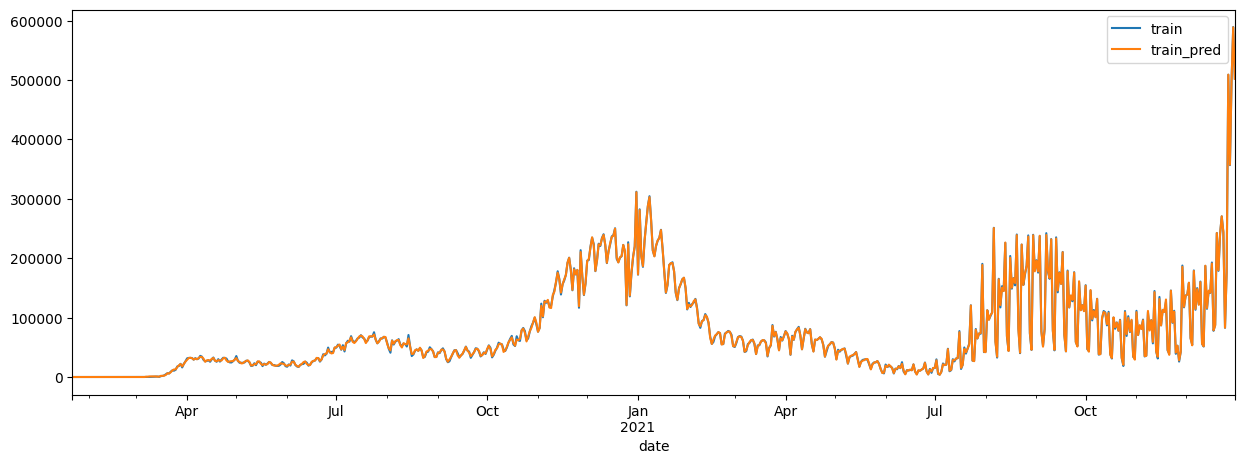

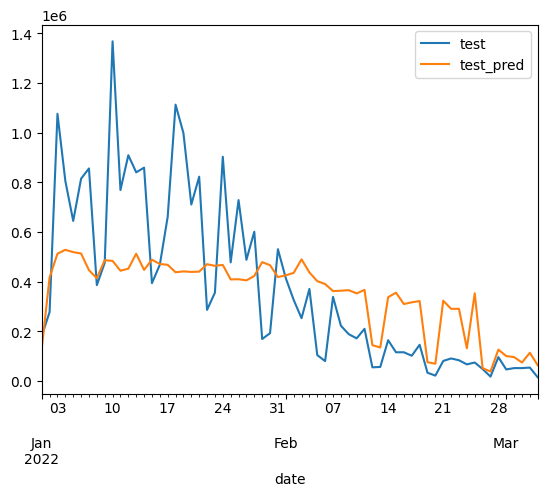

In [66]:
USA_XGB2 = xgb.XGBRegressor(learning_rate=0.1, max_depth=4, n_estimators=370, n_jobs=-1, random_state=0)
USA_XGB2.fit(X_data_TRAIN_USA_XGB_scaled, Y_data_TRAIN_USA_XGB)

USA_XGB_train_pred2 = pd.DataFrame(USA_XGB2.predict(X_data_TRAIN_USA_XGB_scaled), columns=['yhat'], index=x_train_USA.index)
USA_XGB_train_pred2.head()

pd.concat([Y_data_TRAIN_USA_XGB, USA_XGB_train_pred2['yhat']], axis=1).plot(figsize=(15,5))
plt.legend(['train', 'train_pred'])

USA_XGB_pred2 = USA_XGB2.predict(X_data_TEST_USA_XGB_scaled)
RMSE = np.sqrt(mean_squared_error(USA_XGB_pred2, Y_data_TEST_USA_XGB))
print(RMSE)


df_USA = pd.DataFrame(Y_data_TEST_USA_XGB)
df_USA['preds'] = USA_XGB_pred2
df_USA.plot(y=['new_cases', 'preds'])
plt.legend(['test', 'test_pred'])
